<a href="https://colab.research.google.com/github/dostonshernazarov/Passenger-satisfaction-predict-model/blob/main/AviakompaniyaPassengersSatisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import zipfile

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
with zipfile.ZipFile('/content/aviakompaniya.zip', 'r') as zip_ref:
  zip_ref.extractall()

In [3]:
df = pd.read_csv('/content/train_dataset.csv', index_col="id")
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [ ]:
df.shape

(10000, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int64  


In [ ]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [4]:
df.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

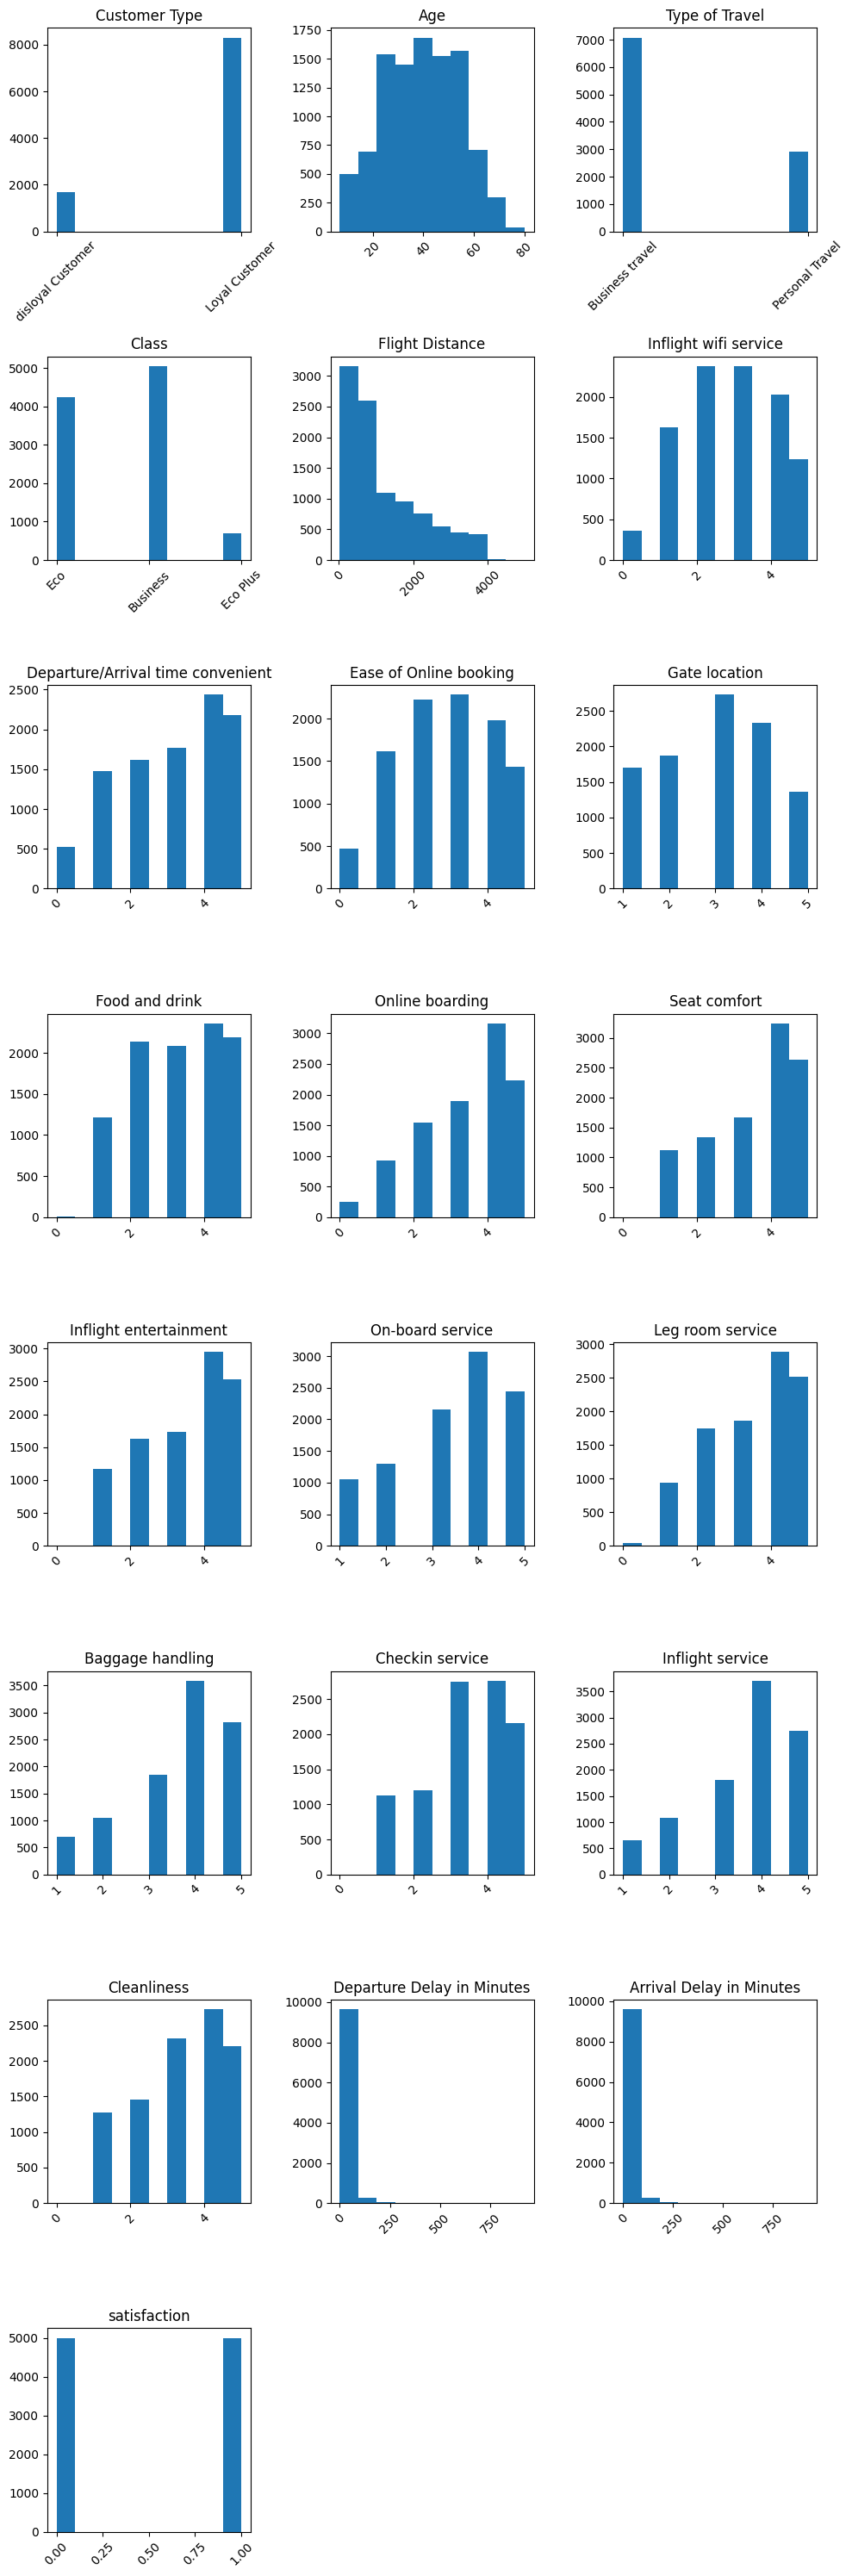

In [5]:
cols = list(df.columns)
cols_df=cols[1:]
plt.figure(figsize=(10,30))
for i in range(len(cols_df)):
    plt.subplot(8,3,i+1)
    plt.title(cols_df[i])
    plt.xticks(rotation=45)
    plt.hist(df[cols_df[i]])

plt.tight_layout()
plt.show()

<Axes: xlabel='Customer Type', ylabel='count'>

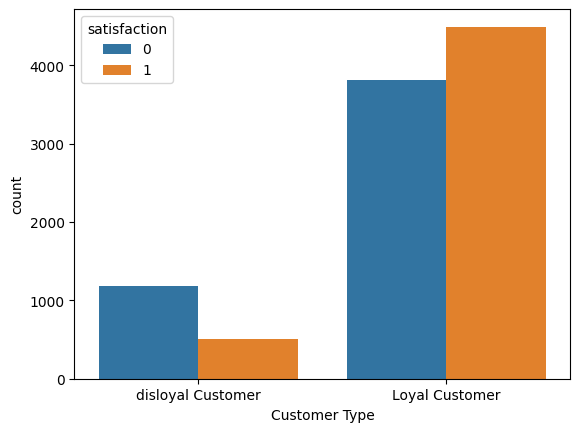

In [7]:
sns.countplot(data=df, x= 'Customer Type', hue= 'satisfaction')


<ipython-input-30-937e46c49ebe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Flight Distance"])


<Axes: xlabel='Flight Distance', ylabel='Density'>

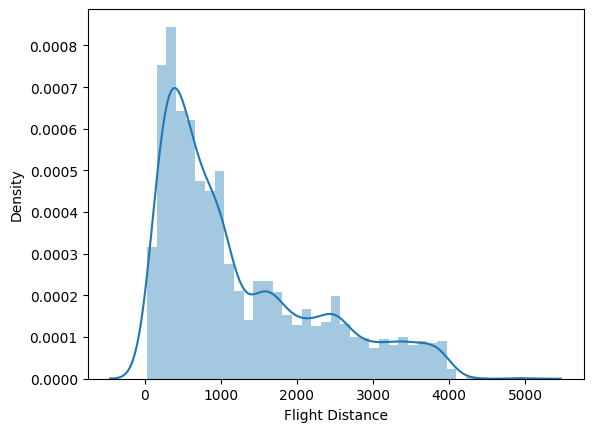

In [ ]:
sns.distplot(df["Flight Distance"])

<ipython-input-33-ec6dddfc5dd5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Arrival Delay in Minutes"])


<Axes: xlabel='Arrival Delay in Minutes', ylabel='Density'>

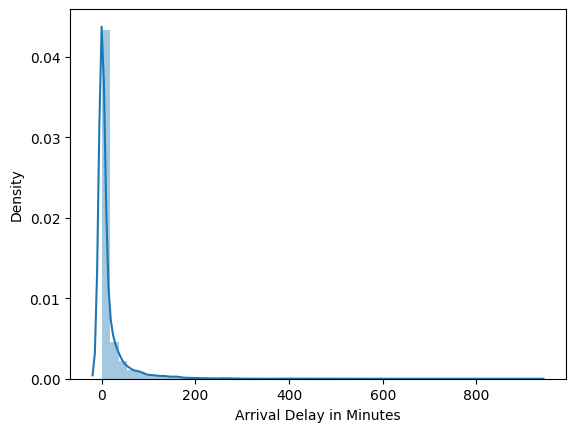

In [ ]:
sns.distplot(df["Arrival Delay in Minutes"])

<ipython-input-34-41fd0fe17466>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Departure Delay in Minutes"])


<Axes: xlabel='Departure Delay in Minutes', ylabel='Density'>

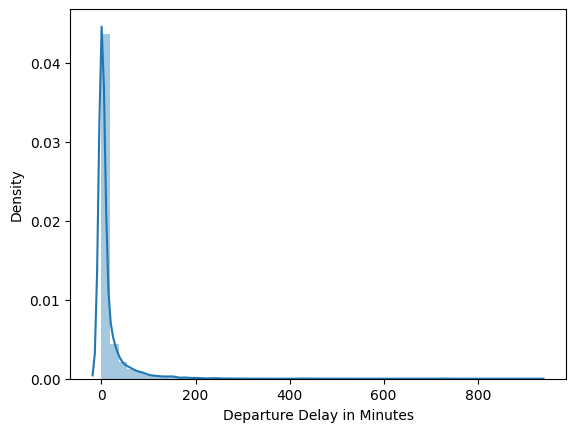

In [ ]:
sns.distplot(df["Departure Delay in Minutes"])

In [8]:
# Drop null
df.dropna(inplace=True)


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9972 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             9972 non-null   object 
 1   Customer Type                      9972 non-null   object 
 2   Age                                9972 non-null   int64  
 3   Type of Travel                     9972 non-null   object 
 4   Class                              9972 non-null   object 
 5   Flight Distance                    9972 non-null   int64  
 6   Inflight wifi service              9972 non-null   int64  
 7   Departure/Arrival time convenient  9972 non-null   int64  
 8   Ease of Online booking             9972 non-null   int64  
 9   Gate location                      9972 non-null   int64  
 10  Food and drink                     9972 non-null   int64  
 11  Online boarding                    9972 non-null   int64  
 

In [12]:
df_final = df.copy(deep = True)
for col in df_final.iloc[:,:-1]:
    if df_final[col].dtype=='object':
        df_final[col] = preprocessing.LabelEncoder().fit_transform(df_final[col])



In [14]:
print(df_final.info())
df_final.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9972 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             9972 non-null   int64  
 1   Customer Type                      9972 non-null   int64  
 2   Age                                9972 non-null   int64  
 3   Type of Travel                     9972 non-null   int64  
 4   Class                              9972 non-null   int64  
 5   Flight Distance                    9972 non-null   int64  
 6   Inflight wifi service              9972 non-null   int64  
 7   Departure/Arrival time convenient  9972 non-null   int64  
 8   Ease of Online booking             9972 non-null   int64  
 9   Gate location                      9972 non-null   int64  
 10  Food and drink                     9972 non-null   int64  
 11  Online boarding                    9972 non-null   int64  
 

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,1,1,33,0,1,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,0,0,49,0,0,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,0,0,43,0,1,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,0,0,27,0,0,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,1,0,11,1,1,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [16]:
# Train & Test splitting
x = df_final.drop(['satisfaction'] , axis = 1)
y = df_final['satisfaction']

In [19]:
# Scaling
sd = preprocessing.StandardScaler()
x_scaled = sd.fit_transform(x)
x_train , x_test , y_train , y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)



In [63]:
results = pd.DataFrame(columns=['Model Name','Model state','Train-set Score','Test-set Score', 'Satisfied Accuracy', 'Dissatisfied Accuracy'])
def fit_model_result(x_train, y_train, x_test, y_test, model, model_name, model_change):
    reg = model
    reg.fit(x_train,y_train)
    train_score = reg.score(x_train,y_train)*100
    test_score = reg.score(x_test,y_test)*100
    y_pred = reg.predict(x_test)
    k = metrics.confusion_matrix(y_test, y_pred,normalize='true')*100
    y_pred = y_pred == y_test
    # random indexing for plotting
    indx = np.random.rand(len(y_pred))
    data = {'Actual':y_test,'Predict':y_pred,'index':indx}
    comp = pd.DataFrame(data)
    results.loc[len(results.index)] = [model_name, model_change, train_score, test_score,round(k[0][0],2),round(k[1][1],2)]
    print(results.iloc[-1,:])
    fig, ax = plt.subplots(figsize=(7, 5))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Dissatisfied', 'Satisfied'], cmap='Greens', normalize='true', ax=ax)
    plt.show()

Model Name               Logistic Regression
Model state                         Original
Train-set Score                    87.025197
Test-set Score                     86.967419
Satisfied Accuracy                     89.14
Dissatisfied Accuracy                  84.73
Name: 0, dtype: object


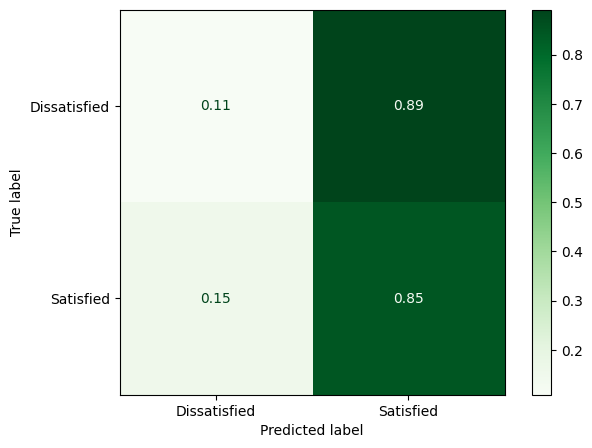

In [64]:
# Logistic Regression
fit_model_result(x_train, y_train, x_test, y_test, linear_model.LogisticRegression(), 'Logistic Regression', 'Original')

Model Name               KNN Classifier
Model state                    Original
Train-set Score               92.892065
Test-set Score                90.576441
Satisfied Accuracy                94.87
Dissatisfied Accuracy             86.15
Name: 1, dtype: object


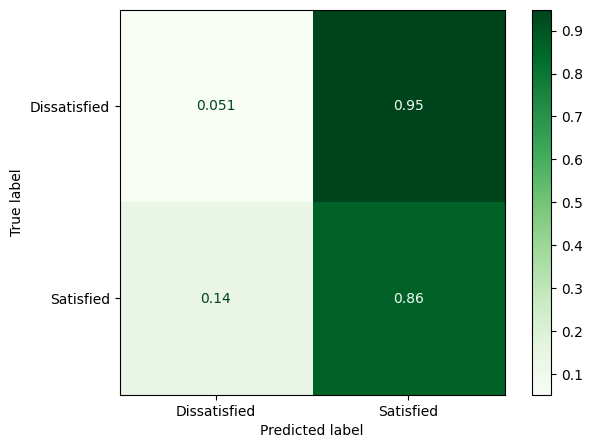

In [65]:
3# KNN Classification
fit_model_result(x_train, y_train, x_test, y_test, KNeighborsClassifier(n_neighbors=7), 'KNN Classifier', 'Original')

Model Name               DT Classifier
Model state                   Original
Train-set Score              98.081986
Test-set Score               93.182957
Satisfied Accuracy               94.27
Dissatisfied Accuracy            92.06
Name: 2, dtype: object


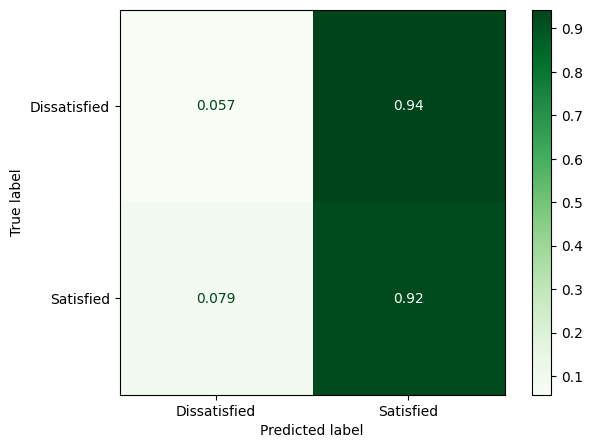

In [66]:
# Decision Tree Classification
fit_model_result(x_train, y_train, x_test, y_test, DecisionTreeClassifier(max_features=16, max_depth=12, random_state=42), 'DT Classifier', 'Original')

Model Name               RF Classifier
Model state                   Original
Train-set Score              99.034725
Test-set Score               94.586466
Satisfied Accuracy               95.76
Dissatisfied Accuracy            93.38
Name: 3, dtype: object


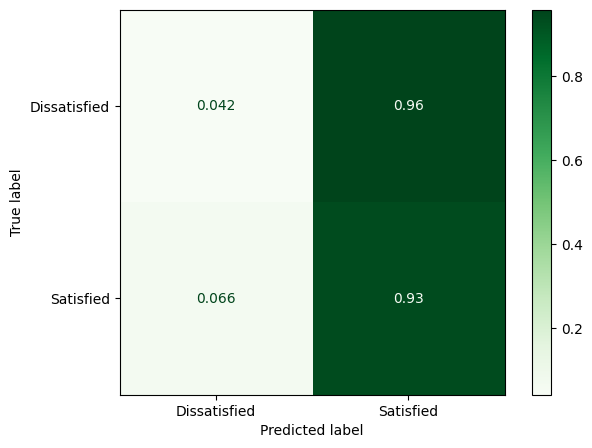

In [67]:
# Random Forest Classification
fit_model_result(x_train, y_train, x_test, y_test, RandomForestClassifier(max_features=16, max_depth=12, random_state=42), 'RF Classifier', 'Original')

In [68]:
results.groupby(['Model Name','Model state'],sort=True).first()

,,Train-set Score,Test-set Score,Satisfied Accuracy,Dissatisfied Accuracy
Model Name,Model state,,,,
DT Classifier,Original,98.081986,93.182957,94.27,92.06
KNN Classifier,Original,92.892065,90.576441,94.87,86.15
Logistic Regression,Original,87.025197,86.967419,89.14,84.73
RF Classifier,Original,99.034725,94.586466,95.76,93.38


In [72]:
# Built model

model = RandomForestClassifier(max_features=16, max_depth=12, random_state=42)

model.fit(x_train, y_train)

# Cross Validation
cross_val_score(model,df_final,y,scoring='r2',cv=10).mean()

1.0

In [74]:
filename = "RFC_PassengerSatisfaction_model.pkl"

with open (filename, "wb") as pklModel:
  pickle.dump(model, pklModel)